In [21]:
import numpy as np
#from math import factorial
from scipy.special import factorial as factorial
import matplotlib.pyplot as plt
from math import pow as power
import pandas as pd


#### Code for Degree\Degrees of Freedom plots

1. Fix $max_s = 8$, $max_m = 10$, $z = -10$, $exact = e^z$
2. For $m\in M = {1,...,max_m}$ and $s\in S = {0,...,max_s}$:
3. Define the Scaling and Squaring Taylor: $$T_{m,s} = \left\{\left[T_m\left(\frac{z}{2^s}\right)\right]^{2^s} : m\in M, s\in S\right\}$$
4. Let $\tilde{m} = m2^s$ and define Pure Truncated Taylor $$T_{\tilde{m}} = \{T_{\tilde{m}}(z) : \tilde{m} = m2^s\}$$
5.  $T^{sort}_{m,s} = sort_{m*s}(T_{m,s})$
6.  $T^{sort}_{\tilde{m}} = sort_{m2^s}(T_{\tilde{m}})$
7. $Error_{ssm} = log_{10}\left(\left|\frac{ exp(z) - T_{{m,s}}\left(\frac{z}{2^s}\right)^{2^s}}{exp(z)}\right|\right)$
8. $Error_{taylor} =  log_{10}\left(\left|\frac{ exp(z) - T_{\tilde{m}}(z)}{exp(z)}\right|\right)$
9. Plot the respective graphs 

In [84]:
def random_points(R =10, no_of_pts = 200):
    '''gives user-defined number of complex points when a radius R is given'''
    #Theta = np.linspace(-np.pi,np.pi,no_of_pts)
    Theta = np.random.uniform(-np.pi,np.pi,no_of_pts)
    Z = [R*np.exp(1j*theta) for theta in Theta]  #R*np.cos(theta)+1j*R*np.sin(theta)
    return np.array(Z)

def approx_taylor_exp(x,m):
        '''Calculates the truncated taylor series of degree m and returns the value
           at the point x'''
        f_m = list(map(lambda j: 1/factorial(j),range(0,m+1)))
        f_m.reverse()
        p = np.poly1d(f_m)
        return p(x)

def rel_error(list1,exact,type='abs'):
    '''Calcutes the log10 of the relative forward error'''
    eps = 0.5*np.spacing(1)
    if type=='rel':
        error = list(map(lambda vec: np.log10((abs(vec[0] - vec[1])/(abs(vec[1])))+eps), zip(list1,exact)))
    elif type=='abs':
        error = list(map(lambda vec: np.log10(abs(vec[0] - vec[1])+eps), zip(list1,exact)))
    return error

def get_m(s):
    '''Used only for DoF. For every s I give it, it gives me a value of truncation parameter
       m s.t. maximum DOF remains constant'''

    m = max_dof - b*s - 1
    if m<=0:
        raise ValueError('the value of m must be positive so please check your code')
    return int(m)

In [85]:
import pandas as pd

R = 20 #radius of all the points we are considering
S = np.arange(0,5)  #s in {0,...,4}
e_mach = 0.5*np.spacing(1)   #machine precision

truncation_para = []  #list to store m
Degrees = []   #list to store degree of poly (2^s*m)
DoF = []       #list to store DoF ((m+1)+3s)
Flattening_error = []  #list to store error where flattening begins
print(f'Value of truncation parameter m where we see line flattening is:\n')
for s in S:
    '''Calculating the truncation parameter m where we see line flattening'''
    max_m = int(R/2**s)   #value of m where we have the largesr error
    delta = np.abs(np.exp(-R/2**s)-((-R/2**s)**max_m)/factorial(max_m))*e_mach   #as shown in the above equation
    m = 0
    error = R**(m+1)/(power(2,s*(m+1))*factorial(m+1))
    while error > delta:
        m+=1
        error = R**(m+1)/(power(2,s*(m+1))*factorial(m+1))
    truncation_para.append(m)
    
    '''Here we use above equation to calculate the rel error where the flatten takes place'''
    flatting_val = np.log10(2**s*np.abs(((-R/2**s)**max_m)/factorial(max_m))*np.exp(R/2**s)*e_mach)
    Flattening_error.append(flatting_val)  
    
    '''Calculating the degree and DoF for using the m and s value computed'''
    Degrees.append(2**s*m)
    DoF.append((m+1)+3*s)
    

df = pd.DataFrame([[m,deg,dof, flattening_val] for m,deg,dof,flattening_val in zip(truncation_para, Degrees, DoF,Flattening_error)],\
                    columns = [r'Truncation Parameter ($m$)',r'Degrees ($2^sm$)', fr'DoF $((m+1)+3s)$', r'$\log_{10}(\text{Flattening})$'],\
                    index = [fr'$s = {s}$' for s in S])
display(df)

Value of truncation parameter m where we see line flattening is:



,Truncation Parameter ($m$),Degrees ($2^sm$),DoF $((m+1)+3s)$,$\log_{10}(\text{Flattening})$
$s = 0$,68,68,69,0.365775
$s = 1$,47,94,51,-7.870378
$s = 2$,33,132,40,-11.765389
$s = 3$,25,200,35,-13.470914
$s = 4$,19,304,32,-14.110692


RELATIVE ERROR

Maximum rel Error

At s=0	z=(-39.99999896095629+0.009117208763174945j)	Theoretical log10 error=0.3657751642759426	log10(max_error)=18.150261755055368
At s=1	z=(-39.950501767308275+1.9893236389029996j)	Theoretical log10 error=-7.870377988371297	log10(max_error)=1.2648297102305064
At s=2	z=(-39.75243137472487+4.443444587005655j)	Theoretical log10 error=-11.765388593714313	log10(max_error)=-7.174915888001755
At s=3	z=(-39.97421374094351-1.4360486737443976j)	Theoretical log10 error=-13.470913556760836	log10(max_error)=-11.125551645580238
At s=4	z=(-39.999903053263395+0.08806661983837781j)	Theoretical log10 error=-14.110691672147958	log10(max_error)=-10.051110279274946



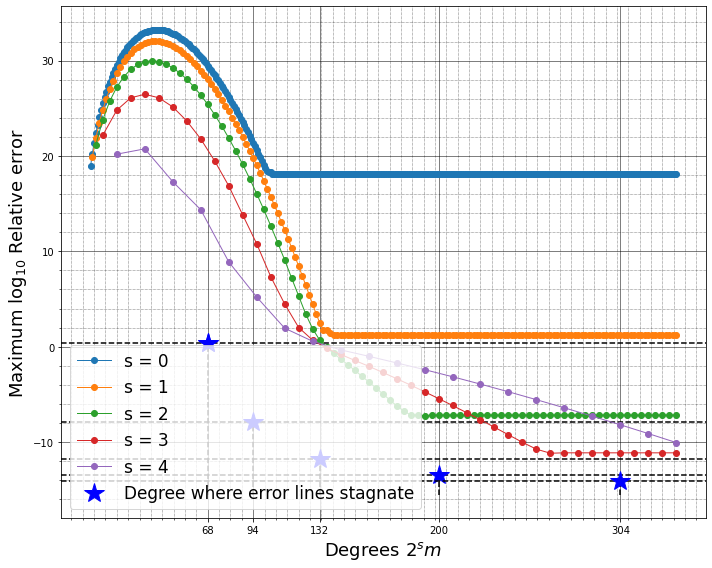

In [95]:

max_m = 21  #m in {1,....,max_m}
max_s = 4  #s in {0,....,max_s}
type = 'rel'
np.random.seed(1234)  #just to fix the random numbers seed

S = np.arange(0,max_s+1)   #s in {0,....,4}
if type == 'abs':
    print('ABSOLUTE ERROR')
else:
    print('RELATIVE ERROR')
#a way of choosing more points for small s and less for large s so that degrees remain constant
M = [np.arange(1,max_m*(2**s)+1) for s in S][::-1]    
R = 40; no_of_pts = 1000  #fixing radius and number of points

Z = random_points(R,no_of_pts)  #generate z values with Radius R
# Z = [-20]
Exact = np.exp(Z)  #exact using in-built function
error_matrix = np.zeros((len(S),int(max_m*(2**S[-1]))),dtype = np.float64)  #creating an empty matrix to store errors

print(f'\nMaximum {type} Error\n')
for i,s in enumerate(S):
    for j,m in enumerate(M[i]):
        T_m_s = (approx_taylor_exp(Z/(2**s),m))**(power(2,s))   #composite poly 
        error = rel_error(T_m_s, Exact,type)  #calculating the log10 rel error
        max_idx = np.argmax(error)
        max_error = max(error)  #choosing the maximum one
        idx = np.argmax(error)
        #print(f's = {s}, m={m}: {Z[idx]}')
        error_matrix[i,j] = max_error  #storing it in the matrix
    print(f'At s={s}\tz={Z[max_idx]}\tTheoretical log10 error={Flattening_error[i]}\tlog10(max_error)={max_error}')
print()
s = 1
#for j,m in enumerate(M[1]):
    #print(np.log10(R/(2**s))*(m+1) - np.log10(float(factorial(m+1))))
'''Plotting on same diagram because made sure all degrees are the same'''
plt.figure(figsize=(10,8),facecolor='w')
ax = plt.subplot(1, 1, 1)

for i,s in enumerate(S):
    #print(M[i])
    #print(error_matrix[i])
    ax.plot([m*2**s for m in M[i]], error_matrix[i][:M[i][-1]], '.-',label = f's = {s}',\
            markersize = 12, lw = 1)
    d = int(R/2**s)
    ax.axhline(y=np.round(Flattening_error[i],2),xmin=0,ls='--', color = 'k',lw=1.5)
    ax.plot((Degrees[i],Degrees[i]),(-15.5,np.round(Flattening_error[i],2)), ls='--', color = 'k',lw=1.5)
    plt.plot([Degrees[i]],[np.round(Flattening_error[i],2)],'b*',markersize=20)
plt.plot([Degrees[0]],[np.round(Flattening_error[0],2)],'b*',markersize=20, label = 'Degree where error lines stagnate')

plt.legend(prop={'size': 17})
#plt.title(f'Maximum Error (R: {R})',fontsize = 22)
plt.xlabel(r'Degrees $2^sm$',fontsize = 18)
plt.ylabel(r'Maximum $\log_{10}$ Relative error',fontsize = 18)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='k')

ax.tick_params(axis='y', colors='k')
ax.set_xticks(Degrees)
#ax.text(-33, 0, '0.34', fontsize=11)
# ax.set_yticks([0.37],minor=False)
# ax.text(-37, -8.2, '-7.87', fontsize=12)
# ax.text(-41, -12, '-11.77', fontsize=12)
# ax.text(-41, -13.7, '-13.47', fontsize=12)
# ax.text(-41, -14.5, '-14.11', fontsize=12)
# ax.tick_params(labelsize=12)

# plt.ylim(-15.5,18)
plt.tight_layout()
#plt.savefig(f'plots/line_graphs/drawing_lines.pdf', format='pdf', dpi=1200)
plt.show()

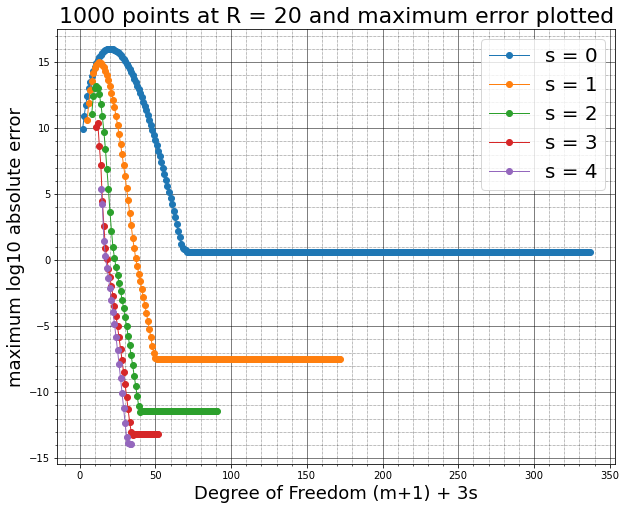

In [5]:
'''Plotting the same thing but against DoF'''
#M_diff = [np.arange(1,(max_m+1)+3*s+1) for s in S][::-1]
   
error_mat_dof = np.zeros((len(S),int(max_m+1+3*max_s)))


for i,s in enumerate(S):
    for j,m in enumerate(M[i]):
        T_m_s = (approx_taylor_exp(Z/(2**s),m))**(2**s)   #composite poly 
        error = rel_error(T_m_s, Exact, type = 'rel')  #calculating the log10 rel error
        max_error = max(error)  #choosing the maximum one
        error_matrix[i,j] = max_error  #storing it in the matrix
  
plt.figure(figsize=(10,8))
for i,s in enumerate(S):
    #print(error_matrix[i])
    plt.plot([((m+1)+3*s) for m in M[i]], error_matrix[i][:M[i][-1]], '.-',label = f's = {s}',\
            markersize = 12, lw = 1)
    
plt.legend(prop={'size': 20})
plt.title(f'{no_of_pts} points at R = {R} and maximum error plotted',fontsize = 22)
plt.xlabel('Degree of Freedom (m+1) + 3s',fontsize = 18)
plt.ylabel('maximum log10 absolute error',fontsize = 18)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='k')
#plt.axhline(error_matrix[0,-1],ls = '--')
#plt.savefig(f'plots/absolute_relative_error_DoF.png', format='png', dpi=1200)
plt.show()

ABSOLUTE ERROR


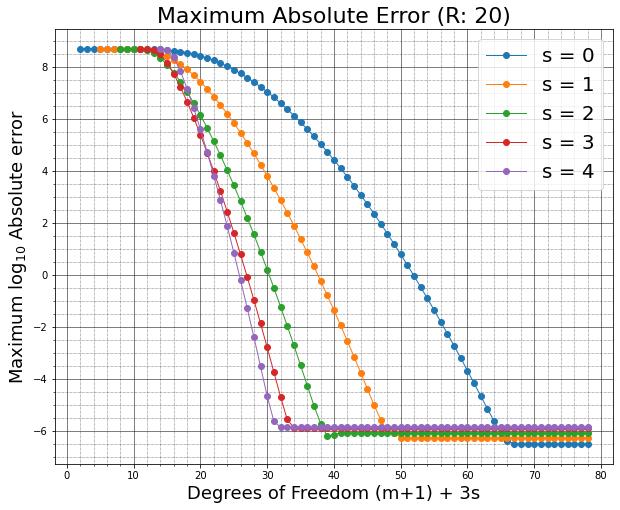

In [6]:
'''Plotting the same thing but against DoF'''

type = 'abs'
b = 3
max_m = 55
max_s = 4
max_dof = (max_m+1)+b*max_s+10
M_dof = [np.arange(1,get_m(s)+1) for s in S]
 
#print(M_dof)
error_mat_dof = np.zeros((len(S),int(max_dof)))
if type == 'abs':
    print('ABSOLUTE ERROR')
else:
    print('RELATIVE ERROR')

for i,s in enumerate(S):
    for j,m in enumerate(M_dof[i]):
        T_m_s = (approx_taylor_exp(Z/(2**s),m))**(2**s)   #composite poly 
        error = rel_error(T_m_s, Exact,type)  #calculating the log10 rel error
        max_error = max(error)  #choosing the maximum one
        idx = np.argmax(error)
#         print(Z[idx])
        error_mat_dof[i,j] = max_error  #storing it in the matrix
        
plt.figure(figsize=(10,8))
for i,s in enumerate(S):
    #print(error_matrix[i])
    plt.plot([((m+1)+b*s) for m in M_dof[i]], error_mat_dof[i][:M_dof[i][-1]], '.-',label = f's = {s}',\
            markersize = 12, lw = 1)
    
plt.legend(prop={'size': 20})
plt.title(f'Maximum Absolute Error (R: {R})',fontsize = 22)
plt.xlabel(f'Degrees of Freedom (m+1) + {b}s',fontsize = 18)
plt.ylabel(r'Maximum $\log_{10}$ Absolute error',fontsize = 18)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='k')
#plt.tight_layout
#plt.axhline(error_matrix[0,-1],ls = '--')
#plt.savefig(f'plots/line_graphs/absolute_error_DoF.pdf', format='pdf', dpi=1200)
#plt.xlim((0,80))
plt.show()

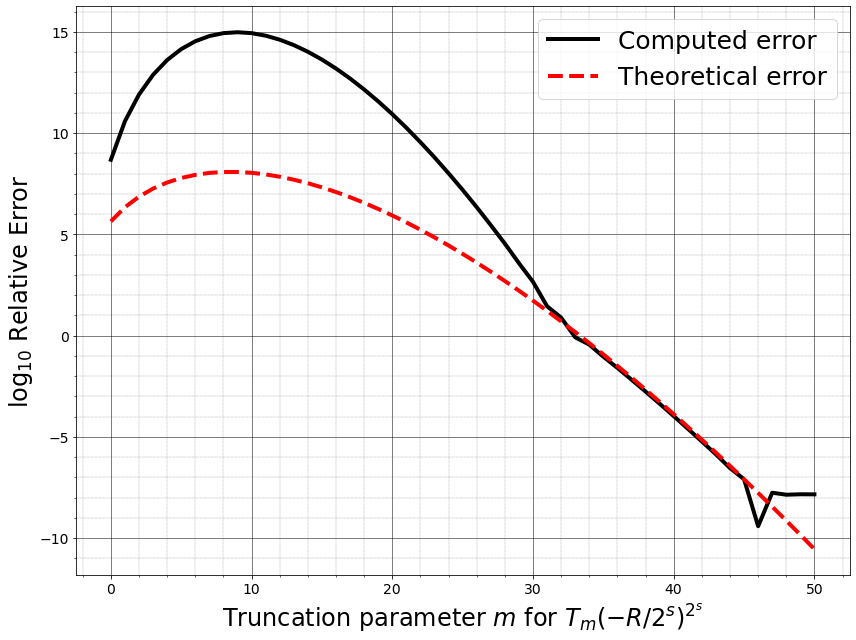

In [105]:
# DD = [78, 48, 37, 27, 20]

s = 1
# M = DD[s]+10
R = 20
M = 50
f_m = [((-R)**k/(2**(k*s)*factorial(k))) for k in range(0,M+1)]

Error = np.zeros(M+1)

for idx,m in enumerate(np.arange(M+1)):
    error = (power(R,m+1)*np.exp(R/(2**s)))/(power(2,s*m)*factorial(m+1))
    Error[idx] = error 
    
plt.figure(figsize=(12,9))
ax = plt.subplot(1, 1, 1)

ax.plot(np.arange(M+1),np.log10(np.abs((np.cumsum(f_m))**(2**s)-np.exp(-R))/np.exp(-R)),'-k',lw=4,label = fr'Computed error');
ax.plot(np.arange(M+1),np.log10(Error),'--r',lw=4,label = fr'Theoretical error');
#plt.plot(range(0,M+1),np.log10(np.absolute((1/np.cumsum(f_m))**(power(2,s))-np.exp(-R))/np.exp(-R)),'-k',lw=3,label = fr'relative error$');

#plt.axhline(y=np.log10(np.exp(-R)),xmin=0,ls='--',color = 'b',lw=2, label=fr'Order of $\exp({-R})$')
#plt.axhline(y=np.log10(np.spacing(1)*0.5),xmin=0,ls='--',color = 'b',lw=2, label = r'$\epsilon_{mach}\approx 1\times 10^{-16}$')   #machine precision

ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='k')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 10))
plt.xlabel('Truncation parameter $m$ for $T_m(-R/2^s)^{2^s}$',fontsize = 24)
plt.ylabel(r"$\log_{10}$ Relative Error",fontsize = 24)
#plt.title(fr'Relative Error for Composite Taylor for $s={s}$ at $z={-R}$',fontsize=18)
plt.legend(loc=1,prop={'size': 25})
plt.tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig(f'plots/theoretical_plots/theo_s{s}.pdf', format='pdf', dpi=1200)


plt.show()

#### So why is using plain Taylor not the way forward?

Suppose we are trying to approximate the function $f(z) = exp(z)$ for $z\in\mathbb{C}$ by a plain taylor series without any scaling, then we can truncate the taylor expansion of $f(z)$ around the origin to give: 
$$T_m(z) = \sum_{k=0}^{m} \frac{z^k}{k!}$$ where $m$ is the truncation parameter and we pick an $m$, such that $fl[T_m(z)] = fl[T_{m+1}(z)]$. Here $fl(.)$ is a floating point representation of a complex number in a exact arithmetic (elaborate more beforehand). This might seem like a perfectly valid way of approximating exponential function but due to floating point arithemtic, we get a pretty poor approximation for large values of $z$ with high magnitude. For example consider $z=-30$ and suppose we are trying to calculate $exp(-40)$. For a machine precision of $\epsilon_{mach} =\approx 1\times 10^{-16}$, we choose our truncation parameter to be $m = 138$ and expected $exp(-40) = 4.248e-18$ correct to 3 decimal places. However, by our approximation, we got a value of $-3.21046...$ which not only has a wrong sign but also is off by order of $10^{18}$. But if you at the term $z^{39}/39!$ and $z^{40}/40!$ who have the value -1.4816805671322668e+16, 1.4816805671322668e+16 respectively. i.e same magnitude but different signs. But since the absolute error is larger than the relative accuracy (since machine precisionis only accurate to 16 digits), we get *catastrophic cancellation* giving us terrible floating point arithemic. Same can be shown for matrix case $A\in \mathbb{C}^{n\times n}$ 

R = 20; s = 1

10


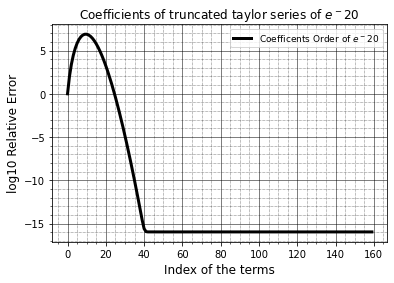

In [66]:
M = np.arange(0,160)
s = 1
R = 40
print(f'R = {R}; s = {s}\n')
Error = np.zeros(len(M))

for idx,m in enumerate(M):
#     error = (power(R,m+1)*np.exp(R/2**s))/(power(2,s*m)*factorial(m+1))
#     error = abs((R/2**s)**m/factorial(m))**(2**s)
    
    Error[idx] = error    
plt.plot(M,np.log10(Error+e_mach),'-k',lw=3,label = fr'Coefficents Order of $e^{-R}$');
# plt.axhline(y=np.log10(np.exp(-R)),xmin=0,ls='--',color = 'r',lw=2, label = r'$\epsilon_{mach}\approx 1\times 10^{-16}$')
# plt.axhline(y=np.log10(np.spacing(1)*0.5),xmin=0,ls='--',color = 'r',lw=2)
# plt.plot([130],[np.log10(np.spacing(1)*0.5)],'b*',markersize=12)
print(int(R/2**s))
#plt.plot([maxi],[2**s*np.log10((x**maxi)/(2**(s*maxi)*factorial(maxi)))],'rx',markersize=8)
#plt.plot(range(0,m+1),np.abs(f_m),'-k',lw=3,label = r'Coefficents Order of $e^{-40}$');
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='k')
plt.xlabel('Index of the terms',fontsize = 12)
plt.ylabel(r"log10 Relative Error",fontsize = 12)
plt.title(fr'Coefficients of truncated taylor series of $e^{-R}$')
plt.legend(loc=1,prop={'size': 9})
#plt.savefig(f'plots/whyNotPlainTaylor/scalarcase.pdf', format='pdf', dpi=1200)
plt.show()




[20]


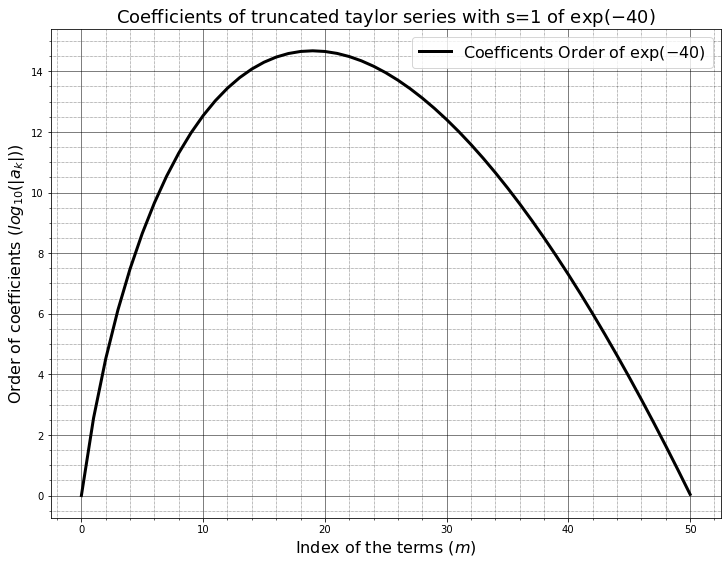

In [109]:
m = 50
#x = -20
s = 1
R = 40
f_m = [((-R)**k/(2**(k*s)*factorial(k))) for k in range(0,m+1)]
print([np.argmax(f_m)])
#f_m.reverse()
max_m = int(R/2**s)
plt.figure(figsize = (12,9))
# plt.plot(range(0,m+1),np.log10(np.absolute(np.exp(-R/2**s)-np.cumsum(f_m))),'-k',lw=3,label = fr'Coefficents Order of $\exp({-R})$');
plt.plot(range(0,m+1),np.log10(np.absolute(np.exp(-R)-np.cumsum(f_m)**(2**s))),'-k',lw=3,label = fr'Coefficents Order of $\exp({-R})$');
# plt.axhline(y=np.log10(abs((-R/2**s)**max_m)/factorial(max_m)),xmin=0,ls='--',color = 'b',lw=2, label=fr'Order of $\exp({-R})$')
# plt.axhline(y=np.log10(np.spacing(1)*0.5),xmin=0,ls='--',color = 'b',lw=2, label = r'$\epsilon_{mach}\approx 1\times 10^{-16}$')   #machine precision


#plt.plot([30],[np.log10(np.exp(-R))],'b*',markersize=12)

plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='k')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='k')
plt.xlabel('Index of the terms ($m$)',fontsize = 16)
plt.ylabel(r"Order of coefficients $\left({log}_{10}(|a_k|)\right)$",fontsize = 16)
plt.title(fr'Coefficients of truncated taylor series with s={s} of $\exp({-R})$', fontsize = 18)
plt.legend(loc=1,prop={'size': 16})
#plt.savefig(f'plots/whyNotPlainTaylor/scalarcase.pdf', format='pdf', dpi=1200)
plt.show()

# #print(f'Coefficents:\n{f_m}\n')
# #print(f'Cumulative Sum:\n{np.cumsum(f_m)}\n')
# print(f'Approximation: {np.sum(f_m)}')
# print(f'Actual Value: {np.exp(x)}')
# print(f'Error: {abs(np.sum(f_m)-np.exp(x))/abs(np.exp(x))}')



In [15]:
#s = 5
R = 20
m = int(R/2**s)
#print(2*np.log10((((R**(m))/(2**(s*m)*factorial(int(round(m)))))*0.5*np.spacing(1)*np.exp(R))))
#np.log10((((R**(R/2**s))/(2**(s*R/(2**s))*factorial(int(round(R/2**s)))))*0.5*np.spacing(1)*np.exp(R)))
for s in range(0,5):
    m = int(R/2**s)
    e_mach = 0.5*np.spacing(1)
    #flatting_val = np.log10(np.abs(np.exp(-R/2**s)-((R**(m+1)*np.exp(R/2**s))/(2**(s*m)*factorial(m+1))))*e_mach)
    flatting_val = np.log10(2**s*np.abs(((-R/2**s)**m)/factorial(m))*np.exp(R/2**s)*e_mach)
    print(f" s = {s}, log10 of the order is {flatting_val}")

 s = 0, log10 of the order is 0.3657751642759426
 s = 1, log10 of the order is -7.870377988371297
 s = 2, log10 of the order is -11.765388593714313
 s = 3, log10 of the order is -13.470913556760836
 s = 4, log10 of the order is -14.110691672147958


In [110]:
R = 20; S=[0,1,2,3,4]; M = [int(R/2**s) for s in S]

for s,m in zip(S,M):
    error1 = ((-R)**m/(factorial(m)))
#     error1 = ((R)**(m+1)/(2**(s*(m+1))*factorial(m+1)))**(2**s)/np.exp(-R)
#     error1 = (-R)**m*np.exp(R)/factorial(m)
    error1 = (1+(np.exp(R/2**s)*(-R/2**s)**m)/(factorial(m)))**(2**s) -1
    error1 = np.log10(abs(error1))
    
    error2 = ((-R/2**s)**m/factorial(m))**(2**s)/np.exp(-R)
    error2 = np.log10(abs(error2))
    
    print(f's: {s}, m:{m}\n{error1}\t{error2}\n')
    


s: 0, m:20
16.320364934466944	16.320364934466944

s: 1, m:10
15.566363586621215	15.566363572311449

s: 2, m:5
14.348115209945577	14.348564740594913

s: 3, m:2
12.734773400920345	12.644689811505788

s: 4, m:1
8.427482545514211	10.236449846193938

